> # **Name:** _Omar Rashad Salem_
> # **Course:** _CV - prof.Heba_
> # **Assignemnt No.:** _4_

> ## QUESTIONS

##### _1)_ **What is the primary difference between a traditional computer program and a neural network in terms of problem-solving?**

**ans:** The main difference is that:
* traditional computer programs often needs manual modification and interaction and is not as independent as the neural networks once they are built/implemented. 
* Also you have to explicitly tell all the data/parameters to traditional computer programs which is not the case for neural networks.
----

##### _2)_ **You have a neural network with three layers: an input layer with 100 neurons, a hidden layer with 50 neurons, and an output layer with 10 neurons. If each neuron in the hidden layer is connected to each neuron in the input and output layers, calculate the total number of weights in the network?**

**ans:** 

* _each connection between two neorons must has a weight._

$$
w_1 = \text{(input layer neurons no)} * \text{(hidden layer neurons no)} 

\\

\therefore w_1 = 100 * 50 = 5,000

\\

w_2 = \text{(hidden layer neurons no)} * \text{(ouput layer neurons no)}


\\

\therefore w_2 = 50 * 10 = 500

\\

w_{tot} = 5,000 + 500

\\

\textbf{answer: W = 5,500}

$$

----
##### _3)_ **Suppose you are training a neural network for image classification with a batch size of 32, and you have 10,000 training images. How many weight updates will occur during one epoch (one pass through the entire training dataset)?**

**ans:** each batch will update weights once:

$$
\text{no. of batches } = \frac{\text{no. of images }}  {\text{batch size}}

\\

\text{no. of batches } = 313 

\\

\therefore \textbf{no. of updates } =  313

\\
$$

----
##### _4)_ **What is backpropagation, and why is it important in training neural networks?**

**ans:**
* __backpropagation:__ recursive application of the chain rule along a computational graph to compute the gradients of all inputs/parameters/intermediates. and happends in upstream direction of the newtowrk (backwards)

* __Importance:__ an efficient technique to compute gradient that **SGD** uses. which is an optimization algorithm used to adjust the model's weights and biases during the training process, allowing the network to learn from data and improve its performance.

----
##### _5)_ **Given an image with dimensions 100x100 pixels and a convolutional layer with a 3x3 filter and no padding, calculate the dimensions of the feature map produced.?**

**ans:** 

W = 10,000 pixesl , K = 9 pixels , p = 0

$$
\text{feature map size } = W - K + 1 + 2p
\\
\therefore \textbf{feature map size } = 9,992 pixels
$$

----
##### _6)_ **What are filters (kernels) in a convolutional layer, and how are they used to extract features from images?**

**ans:** 
* **kernels:** are small matrices used for the convolution operation. The convolutional layer applies these filters to input data, such as images, to extract important features. Each filter learns to detect specific patterns or features in the input.

* convolving kernels with specific weight distributions helps highliting unique image features by giving them higher weights e.g.(edges,corners & orientation) and hides unimportant parts of the image be giving them smaller/zero weights to be then be used as a calssifiers 



----

> ## Programming Assignment: 
> #### MNIST Image Classification with a Simple Neural Network

_Build and train a basic neural network to classify handwritten digits from the MNIST dataset. Experiment with different hyperparameters to observe their impact on model performance._


**Experimentation:**

•          Change hyperparameters systematically and observe their effects on model performance.

•          For instance, test different learning rates, layer configurations, or batch sizes.

**Reporting:**

•          Summarize results with tables or charts.


•          Discuss how changing hyperparameters impacted the model's performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#init your hyperparameters
learn_rate = [1e-4, 0.10, 0.25]
passes = [5, 10, 100]
batch_sz = [10, 100, 1000]

# Build the model
model = Sequential([
    Flatten(input_shape=(32, 32, 1)), 
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes (digits 0-9)
])

In [ ]:

# result = [[None]]*3 # list of 3 lists each one has the [acc,loss]
result = [[] for _ in range(3)]  #empty nested list [[],[],[]]

#test using test imageset (10k images) and train with 50k images
print(f"model summary: {model.summary()} ")
print(f"stated testing the model with various hyperparameters...")
for i in range(3):
   print("\n##############\n")
   for j in range(3):
      if i == 0: #try diff batch sizes
         # Compile the model
         model.compile(optimizer= SGD(learning_rate= 0.1),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
         # Train the model
         model.fit(x_train, y_train, epochs= 5, batch_size=batch_sz[j], validation_data=(x_test, y_test))
         # Evaluate the model on the test set
         test_loss, test_acc = model.evaluate(x_test, y_test)
         
         result[i] += [(test_acc, test_loss)]
         print(f'testing(batch sizes) accuracy result({j}) = {result[i][j][0]}')
      elif i == 1: #try diff epochs number
         # Compile the model
         model.compile(optimizer= SGD(learning_rate= 0.1),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
         # Train the model
         model.fit(x_train, y_train, epochs= passes[j], batch_size= 10, validation_data=(x_test, y_test))
         # Evaluate the model on the test set
         test_loss, test_acc = model.evaluate(x_test, y_test)
         
         result[i] += [(test_acc, test_loss)]
         print(f'testing(Epochs no.) accuracy result({j}) = {result[i][j][0]}')
         
      elif i == 2: #try diff learn rates
         # Compile the model
         model.compile(optimizer= SGD(learning_rate= learn_rate[j]),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
         # Train the model
         model.fit(x_train, y_train, epochs=5, batch_size= 10, validation_data=(x_test, y_test))
         # Evaluate the model on the test set
         test_loss, test_acc = model.evaluate(x_test, y_test)
         
         result[i] += [(test_acc, test_loss)]
         print(f'testing(learn rate) accuracy result({j}) = {result[i][j][0]}')

   

> #### 4) Performance plots 

* _only one hyperparameter is changed per plot_
* _Using softmax & ReLu Activation functions in all Plots_

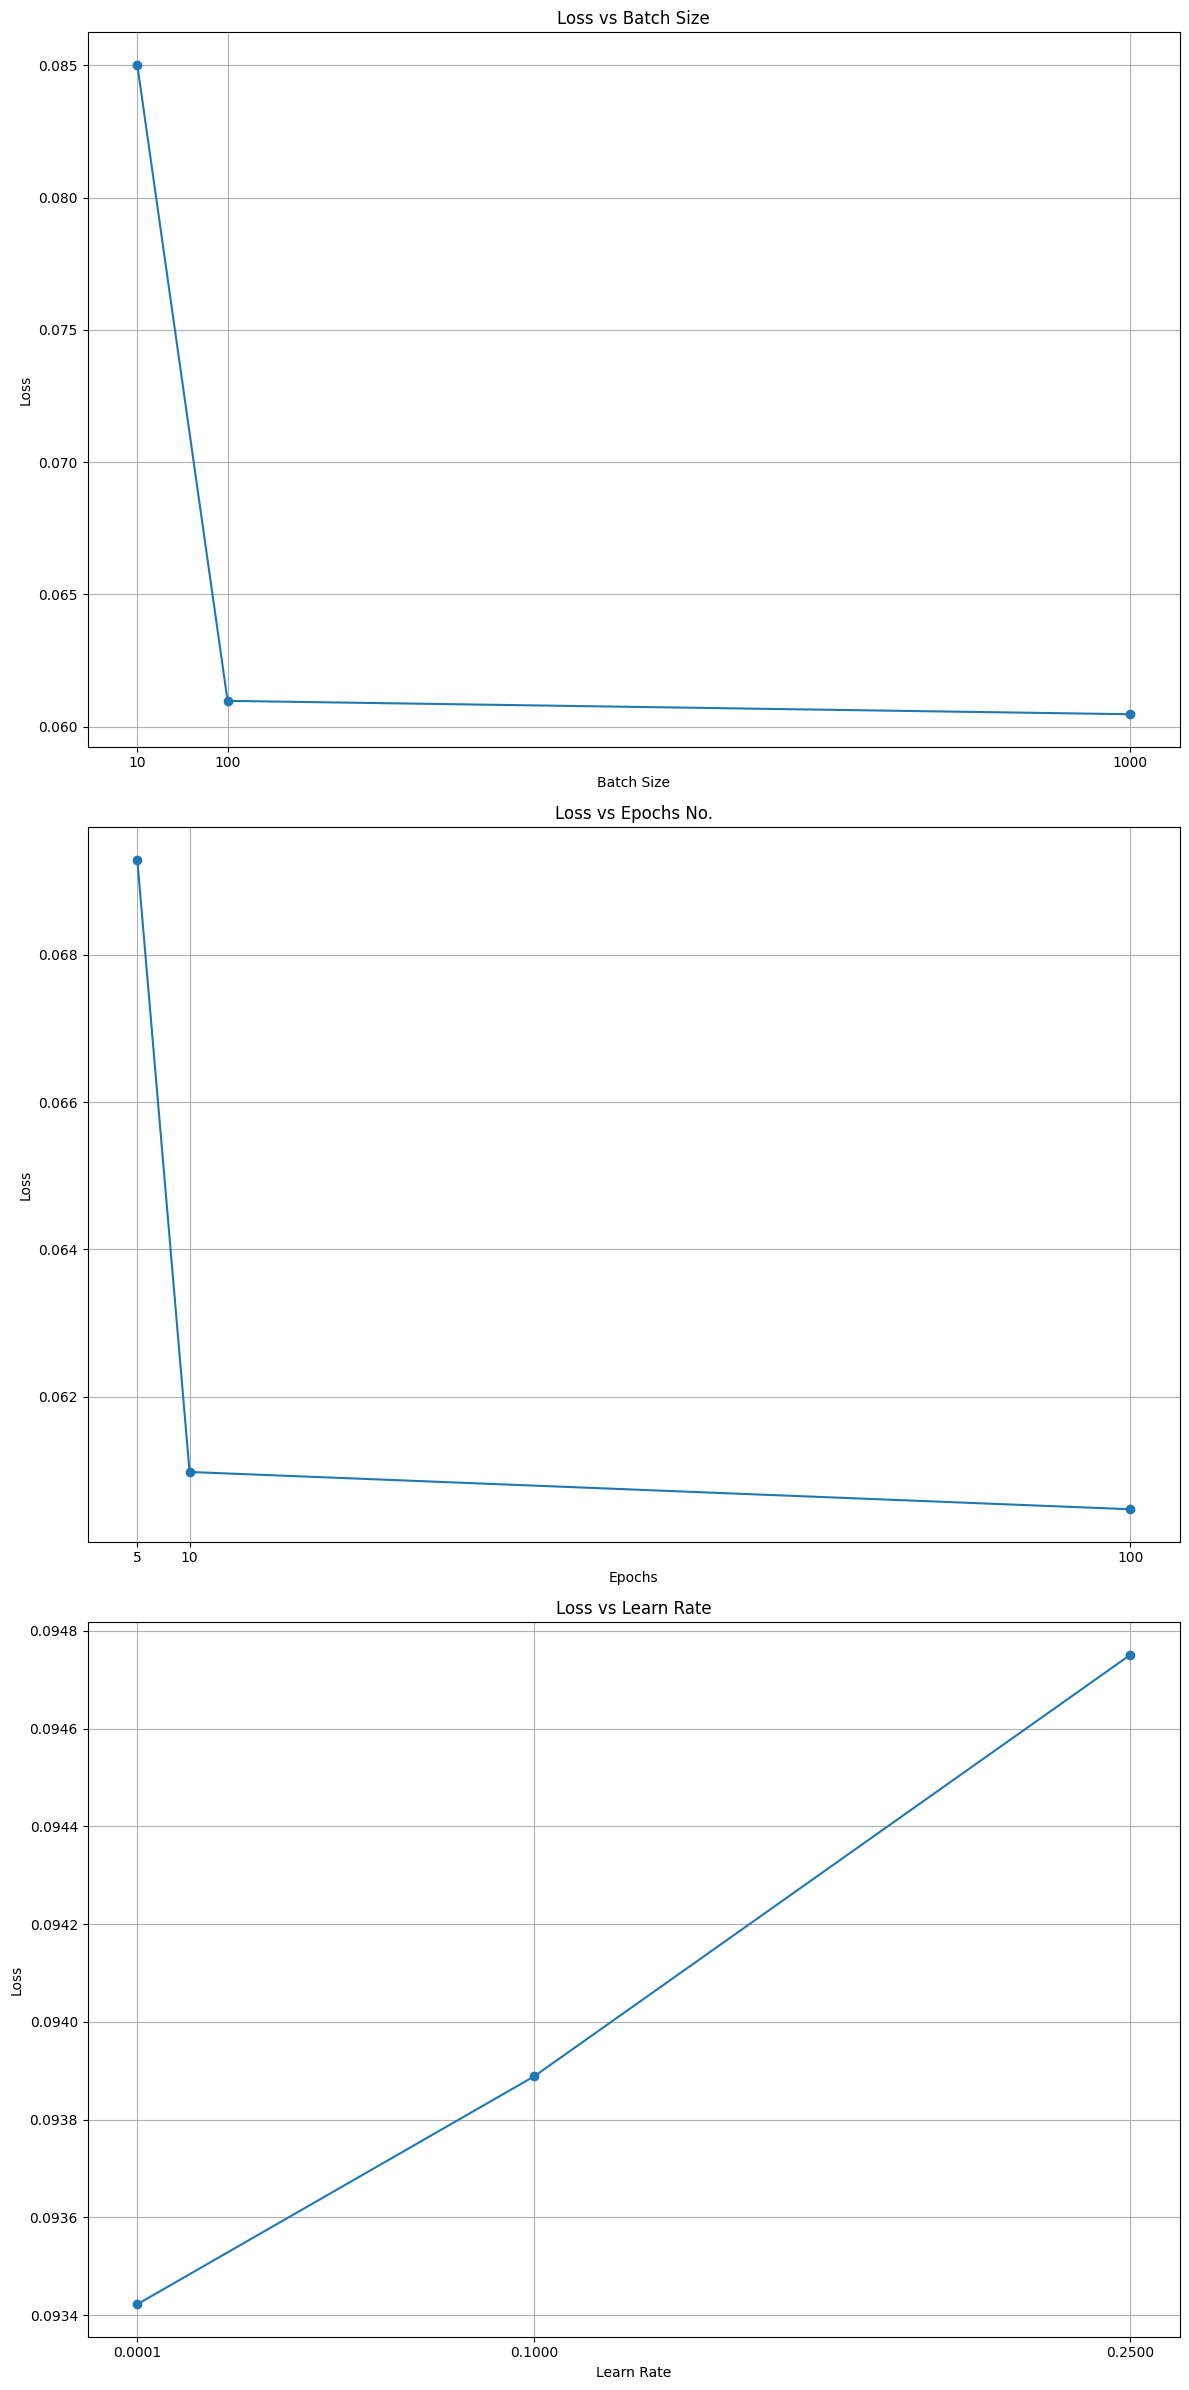

In [42]:
import matplotlib.pyplot as plt
import numpy as np

result = np.array(result).squeeze()
fig, axs = plt.subplots(3  , 1, figsize=(12, 24) )  # 1 row, 2 columns for subplots

loss0 = [result[0][0][1],result[0][1][1],result[0][2][1]]
axs[0].plot(batch_sz, loss0, marker='o', linestyle='-')
axs[0].set_title('Loss vs Batch Size')
axs[0].set_xticks(batch_sz)
# axs[0].set_yticks(loss0)
axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

loss1 = [result[1][0][1],result[0][1][1],result[0][2][1]]
axs[1].plot(passes, loss1, marker='o', linestyle='-')
axs[1].set_title('Loss vs Epochs No.')
axs[1].set_xticks(passes)
# axs[1].set_yticks(loss1)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)


loss2 = [result[2][0][1],result[2][1][1],result[2][2][1]]
axs[2].plot(learn_rate, loss2 , marker='o', linestyle='-')
axs[2].set_title('Loss vs Learn Rate')
axs[2].set_xticks(learn_rate)
# axs[2].set_yticks(loss2)
axs[2].set_xlabel('Learn Rate')
axs[2].set_ylabel('Loss')
axs[2].grid(True)
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plots
plt.show()
